In [4]:
import os
import sys
project_path = '..'
sys.path.append(project_path)
from src.data_preprocessing import data_processing

In [99]:
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn

In [100]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('png')

In [101]:
df = pd.read_excel('./1_data.xlsx').values
df.shape

/var/folders/6s/jttrjjc92qj8wflfcb45sxlw0000gn/T/ipykernel_14882/2731769808.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data = pd.read_excel('./1_data.xlsx').values


(103, 8)

In [102]:
# Split the training and testing data
train_data = df[:60, :]
test_data = df[60:, :]
# split the data into input and output
train_X = train_data[:, :-1]
train_Y = train_data[:, -1]
test_X = test_data[:, :-1]
test_Y = test_data[:, -1]
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape


((60, 7), (60,), (43, 7), (43,))

In [103]:
# Convert the data to tensor
train_X = torch.tensor(train_X, dtype=torch.float32)
train_Y = torch.tensor(train_Y, dtype=torch.float32).view(-1, 1)
test_X = torch.tensor(test_X, dtype=torch.float32)
test_Y = torch.tensor(test_Y, dtype=torch.float32).view(-1, 1)

In [104]:
# Define the model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear_1 = torch.nn.Linear(7, 5)
        self.linear_2 = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.linear_1(x))
        y_pred = self.linear_2(x)
        return y_pred

model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [105]:
# Train the model
epochs = 1000
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(train_X)
    loss = criterion(y_pred, train_Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')


Epoch: 0, Loss: 7115.16845703125
Epoch: 100, Loss: 275079135232.0
Epoch: 200, Loss: 4838083584.0
Epoch: 300, Loss: 85092056.0
Epoch: 400, Loss: 1496660.875
Epoch: 500, Loss: 26390.1953125
Epoch: 600, Loss: 531.1565551757812
Epoch: 700, Loss: 76.34913635253906
Epoch: 800, Loss: 68.35005950927734
Epoch: 900, Loss: 68.20936584472656


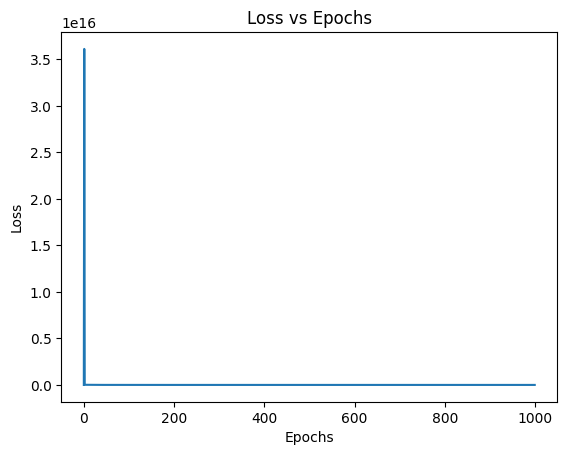

In [106]:
# plot losses vs epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()